In [16]:
# importing neccessary libraries
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Opening the dataset and assigning it to ds

ds = xr.open_dataset('cru_ts4.07.1901.2022.pre.dat.nc', engine='netcdf4').load()


In [4]:

#  Bounding Box for Equatorial Guinea

min_lat, max_lat = -1.0, 4.0
min_lon, max_lon = 8.0, 11.5

# data for E.Guinea and time period 1990-2020

subset = ds.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon),
                time=slice('1990-01-01', '2020-12-31'))['pre']

subset

<xarray.DataArray 'pre' (time: 372, lat: 10, lon: 7)> Size: 104kB
array([[[       nan, 342.4     , 317.7     , ..., 246.7     ,
         226.5     , 189.3     ],
        [       nan,        nan, 308.30002 , ..., 241.6     ,
         209.      , 168.40001 ],
        [       nan,        nan, 304.80002 , ..., 252.6     ,
         196.7     , 153.2     ],
        ...,
        [       nan,        nan,        nan, ...,  57.8     ,
          45.9     ,  44.3     ],
        [ 49.4     ,  52.2     ,        nan, ...,  29.6     ,
          30.6     ,  34.9     ],
        [       nan,  45.      ,  27.1     , ...,  21.800001,
          22.300001,  21.9     ]],

       [[       nan, 150.2     , 149.5     , ..., 143.2     ,
         159.90001 , 164.5     ],
        [       nan,        nan, 156.2     , ..., 153.8     ,
         151.40001 , 153.8     ],
        [       nan,        nan, 177.      , ..., 159.5     ,
         152.40001 , 139.      ],
...
        [       nan,        nan,        nan, ..., 206.5     ,
         191.6     , 174.      ],
        [155.      , 161.7     ,        nan, ..., 165.5     ,
         161.5     , 151.2     ],
        [       nan, 144.1     , 120.      , ..., 126.4     ,
         129.40001 , 122.8     ]],

       [[       nan, 247.      , 237.8     , ..., 207.      ,
         198.40001 , 193.5     ],
        [       nan,        nan, 246.2     , ..., 213.1     ,
         193.3     , 179.90001 ],
        [       nan,        nan, 267.      , ..., 217.90001 ,
         185.6     , 165.1     ],
        ...,
        [       nan,        nan,        nan, ..., 145.40001 ,
         118.4     ,  92.6     ],
        [168.1     , 167.90001 ,        nan, ..., 103.8     ,
          83.700005,  71.200005],
        [       nan, 151.40001 ,  81.200005, ...,  63.9     ,
          54.2     ,  50.2     ]]], shape=(372, 10, 7), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1990-01-16 1990-02-15 ... 2020-12-16
  * lat      (lat) float32 40B -0.75 -0.25 0.25 0.75 ... 2.25 2.75 3.25 3.75
  * lon      (lon) float32 28B 8.25 8.75 9.25 9.75 10.25 10.75 11.25
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

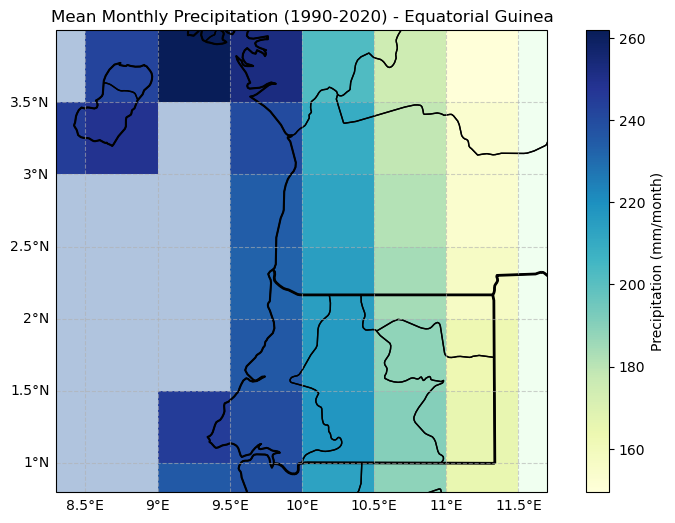

In [5]:
# Calculating Mean Precipitation 

mean_pre = subset.mean(dim='time')

# Plotting the results

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
eq_guinea_extent = [8.3, 11.7, 0.8, 4.0]
ax.set_extent(eq_guinea_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='honeydew')
ax.add_feature(cfeature.OCEAN, facecolor='lightsteelblue')
ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS, linewidth=2, edgecolor='black')
mean_pre.plot(cmap='YlGnBu', cbar_kwargs={'label': 'Precipitation (mm/month)'})
plt.title('Mean Monthly Precipitation (1990-2020) - Equatorial Guinea')
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.6)
gl.top_labels = False
gl.right_labels = False
plt.show()

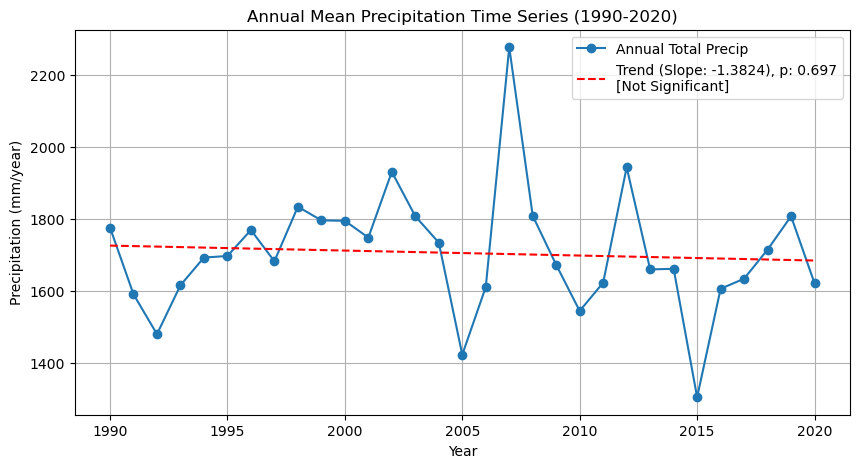

In [9]:
# ANNUAL MEAN PRECIPITATION TIME SERIES
# 'YS' stands for Annual Start frequency.
annual_precip_spatial = subset.resample(time='YS').sum()
annual_precip_series = annual_precip_spatial.mean(dim=['lat', 'lon'])
years = annual_precip_series.time.dt.year.values
precip_values = annual_precip_series.values
slope, intercept, r_value, p_value, std_err = stats.linregress(years, precip_values)
trend_line = intercept + slope * years
is_significant = "Significant" if p_value < 0.05 else "Not Significant"
plt.figure(figsize=(10, 5))
plt.plot(years, precip_values, marker='o', label='Annual Total Precip')
plt.plot(years, trend_line, 'r--', label=f'Trend (Slope: {slope:.4f}), p: {p_value:.3f}\n[{is_significant}]')
plt.title('Annual Mean Precipitation Time Series (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/year)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# variability analysis

# Standard Deviation
std_dev = annual_precip_series.std().values
print(f"Standard Deviation of Annual Precipitation: {std_dev:.3f} mm/year")

#Coefficient of Variation (CV) 
cv = (std_dev / annual_precip_series.mean().values) * 100
print(f"Coefficient of Variation: {cv:.3f}%")



Standard Deviation of Annual Precipitation: 169.710 mm/year
Coefficient of Variation: 9.955%


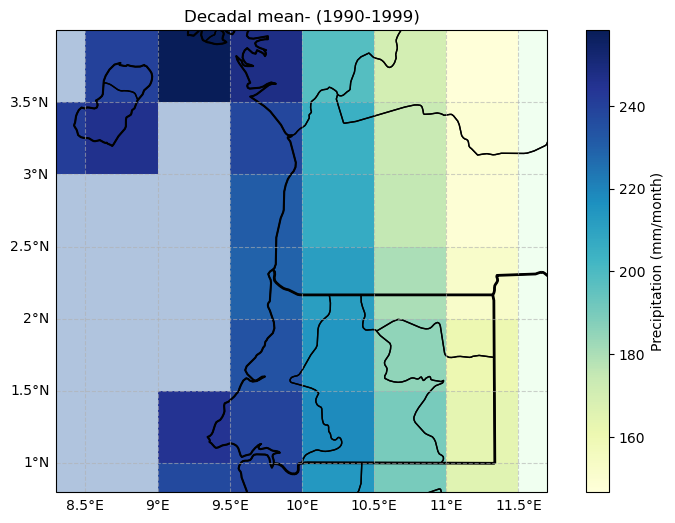

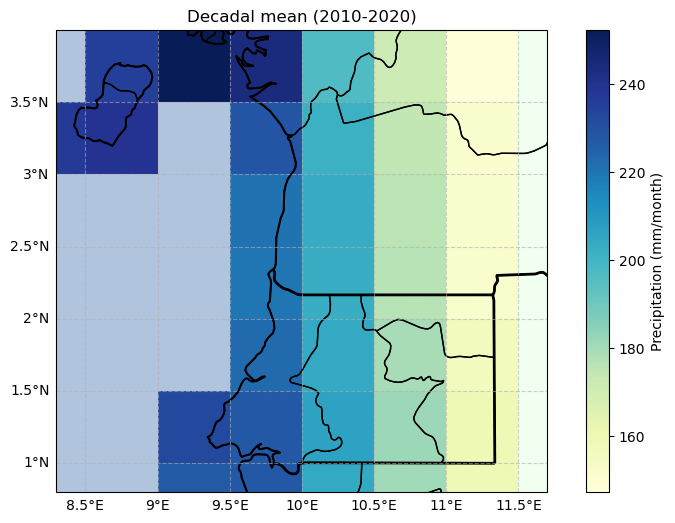

In [11]:
# mean of the first decade and plot

decade_1 = subset.sel(time=slice('1990-01-01', '1999-12-31')).mean(dim='time')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
eq_guinea_extent = [8.3, 11.7, 0.8, 4.0]
ax.set_extent(eq_guinea_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='honeydew')
ax.add_feature(cfeature.OCEAN, facecolor='lightsteelblue')
ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS, linewidth=2, edgecolor='black')
decade_1.plot(cmap='YlGnBu', cbar_kwargs={'label': 'Precipitation (mm/month)'})
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.6)
gl.top_labels = False
gl.right_labels = False
plt.title('Decadal mean- (1990-1999)')
plt.show()



# second decade

decade_2 = subset.sel(time=slice('2010-01-01', '2020-12-31')).mean(dim='time') 

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
eq_guinea_extent = [8.3, 11.7, 0.8, 4.0]
ax.set_extent(eq_guinea_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='honeydew')
ax.add_feature(cfeature.OCEAN, facecolor='lightsteelblue')
ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS, linewidth=2, edgecolor='black')
decade_2.plot(cmap='YlGnBu', cbar_kwargs={'label': 'Precipitation (mm/month)'})
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.6)
gl.top_labels = False
gl.right_labels = False
plt.title('Decadal mean (2010-2020)')
plt.show()


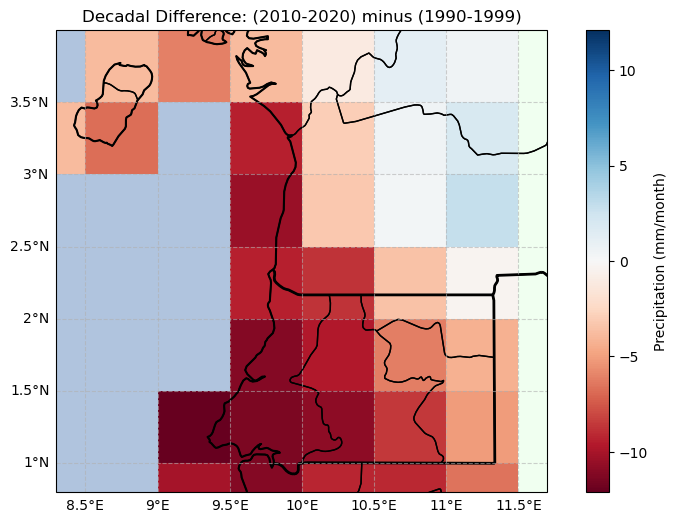

In [12]:
#  Decadal Changes 

decade1 = subset.sel(time=slice('1990-01-01', '1999-12-31')).mean(dim='time')
decade2 = subset.sel(time=slice('2010-01-01', '2020-12-31')).mean(dim='time')
diff = decade2 - decade1

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
eq_guinea_extent = [8.3, 11.7, 0.8, 4.0]
ax.set_extent(eq_guinea_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='honeydew')
ax.add_feature(cfeature.OCEAN, facecolor='lightsteelblue')
ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS, linewidth=2, edgecolor='black')
diff.plot(cmap='RdBu', center=0, cbar_kwargs={'label': 'Precipitation (mm/month)'})
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.6)
gl.top_labels = False
gl.right_labels = False
plt.title('Decadal Difference: (2010-2020) minus (1990-1999)')
plt.show()

In [19]:
# hotspot identifications 
df_diff = diff.to_dataframe(name='magnitude').reset_index()

# 2. Removing any NaN values 
df_diff = df_diff.dropna(subset=['magnitude'])

# 3. Identify Top 5 Increases 
top_5_increase = df_diff.nlargest(5, 'magnitude')

# 4. Identify Top 5 Decreases
top_5_decrease = df_diff.nsmallest(5, 'magnitude')

# Displaying the results for Part 3.2
print("--- Top 5 Grid Points: Largest Increase ---")
print(top_5_increase[['lat', 'lon', 'magnitude']])

print("\n--- Top 5 Grid Points: Largest Decrease ---")
print(top_5_decrease[['lat', 'lon', 'magnitude']])

--- Top 5 Grid Points: Largest Increase ---
     lat    lon  magnitude
55  2.75  11.25   2.864288
62  3.25  11.25   1.943283
68  3.75  10.75   1.181107
69  3.75  11.25   0.504364
61  3.25  10.75   0.494980

--- Top 5 Grid Points: Largest Decrease ---
     lat    lon  magnitude
30  1.25   9.25 -12.104431
31  1.25   9.75 -11.379364
38  1.75   9.75 -11.103775
24  0.75   9.75 -11.068756
32  1.25  10.25 -10.794357


D:\anaconda\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1617: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


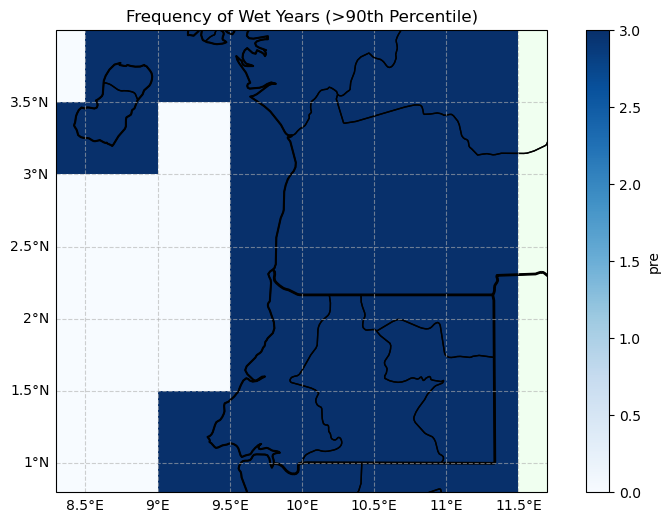

In [13]:
#  Wet Year Frequency 
annual_grid = subset.groupby('time.year').mean(dim='time')
# 90th percentile threshold across the time 
threshold = annual_grid.quantile(0.9, dim='year')
#  years exceeding the threshold
wet_years = (annual_grid > threshold).sum(dim='year')


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
eq_guinea_extent = [8.3, 11.7, 0.8, 4.0]
ax.set_extent(eq_guinea_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='honeydew')
ax.add_feature(cfeature.OCEAN, facecolor='lightsteelblue')
ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS, linewidth=2, edgecolor='black')
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.6)
gl.top_labels = False
gl.right_labels = False
wet_years.plot(cmap='Blues')
plt.title('Frequency of Wet Years (>90th Percentile)')
plt.show()




   